# Webtask Demo: E-commerce Shopping Cart

This notebook demonstrates automated web interaction using Webtask to add items to a shopping cart.

## 1. Setup

Install dependencies and import required libraries.

In [8]:
!pip install -e .. 

I0000 00:00:1762587779.213177 11017861 fork_posix.cc:71] Other threads are currently calling into gRPC, skipping fork() handlers


Obtaining file:///Users/stevewang/Github/web-auto/webtask
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pywebtask (pyproject.toml) ... done
  Created wheel for pywebtask: filename=pywebtask-0.9.6-0.editable-py3-none-any.whl size=4640 sha256=3b0f26a6c31192d738ee56982efd5ce4e7e9a311ab38f32d3dc61e67428b8562
  Stored in directory: /private/var/folders/gf/f2gq1g_97yl5m14bd6t4chm80000gp/T/pip-ephem-wheel-cache-k1p5vc1a/wheels/7b/f0/6f/e5a0e81d9f5259d8dd15015bc30fcbb2ed08e174606e4fc43b
Successfully built pywebtask
  Attempting uninstall: pywebtask
    Found existing installation: pywebtask 0.9.6
    Uninstalling pywebtask-0.9.6:
      Successfully uninstalled pywebtask-0.9.6

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [9]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [10]:
from webtask import Webtask
from webtask.integrations.llm.google import GeminiLLM

wt = Webtask()
# GeminiLLM will automatically read GOOGLE_API_KEY from environment
llm = GeminiLLM.create(model="gemini-2.5-flash")

In [11]:
# Create agent
agent = await wt.create_agent(llm=llm)

I0000 00:00:1762587781.790736 11017861 fork_posix.cc:71] Other threads are currently calling into gRPC, skipping fork() handlers


## 3. Initial State

Navigate to the website and capture the starting state.

Screenshot BEFORE task execution:


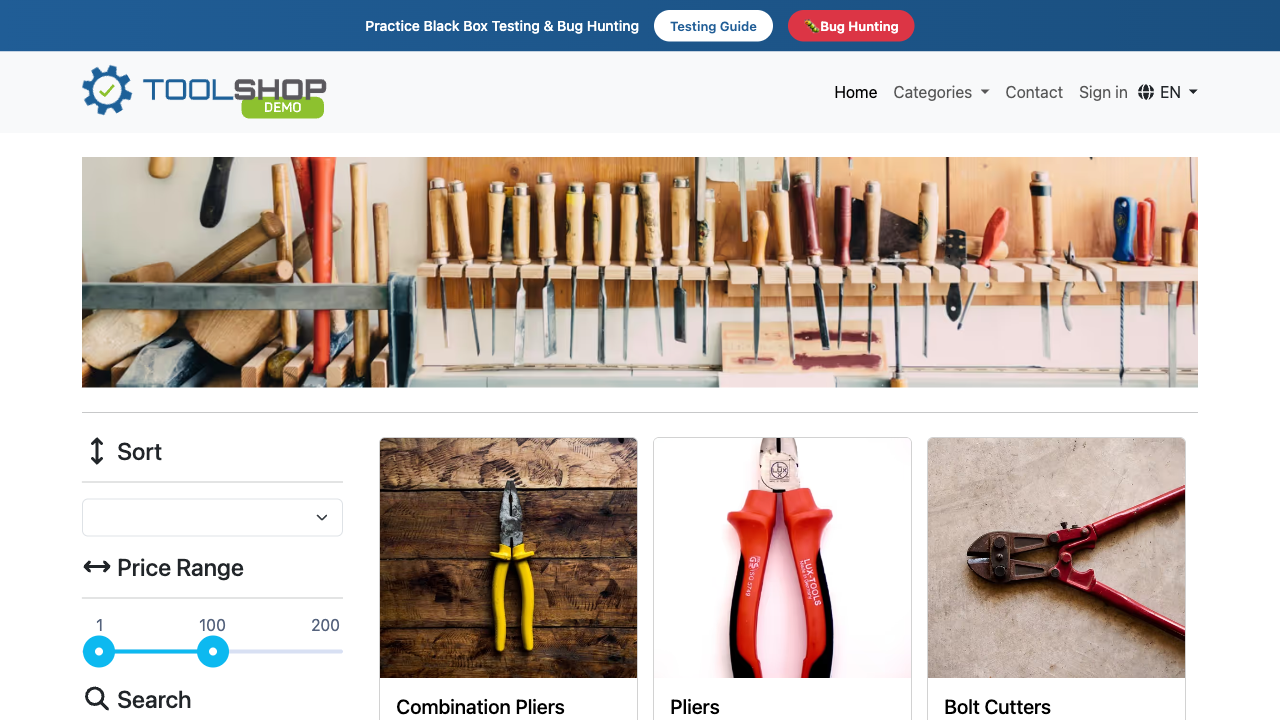

In [12]:
# Navigate to the starting page first
await agent.navigate("https://practicesoftwaretesting.com/")
await agent.wait_for_idle()

# Take screenshot before starting the task
print("Screenshot BEFORE task execution:")
await agent.screenshot("before_task.png")
display(Image(filename="before_task.png", width=800))

## 4. Execute Task

Run the agent autonomously to add items to the shopping cart and print the complete result.

In [13]:
# Execute the task autonomously
result = await agent.execute(
    "add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and proceed to the cart",
    max_cycles=10
)

# Print the complete task result
print(result)

TASK EXECUTION
Task: add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and proceed to the cart
Complete: False

SUBTASK QUEUE:
--------------------------------------------------------------------------------
    0. ✅ Add 2 Flat-Head Wood Screws to the cart [complete]
    1. ✅ Add 5 cross-head screws to the cart [complete]
  → 2. ✅ Proceed to the cart [complete]

EXECUTION HISTORY:
--------------------------------------------------------------------------------

Session 1:
  === Planner Session ===
  Task: add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, and proceed to the cart
  Iterations: 1/3
  
  --- Iteration 1 ---
    Observation: No subtasks created yet.
    Thinking: The overall task is to add 2 Flat-Head Wood Screws and 5 cross-head screws to the cart, then proceed to the cart. The first step is to add the first item to the cart.
    Actions (1):
      ✓ Started subtask to add 2 Flat-Head Wood Screws to the cart.
         Tool: start_subtask(goal=

## 5. Final State

Capture the final state after task completion.

Screenshot AFTER task execution:


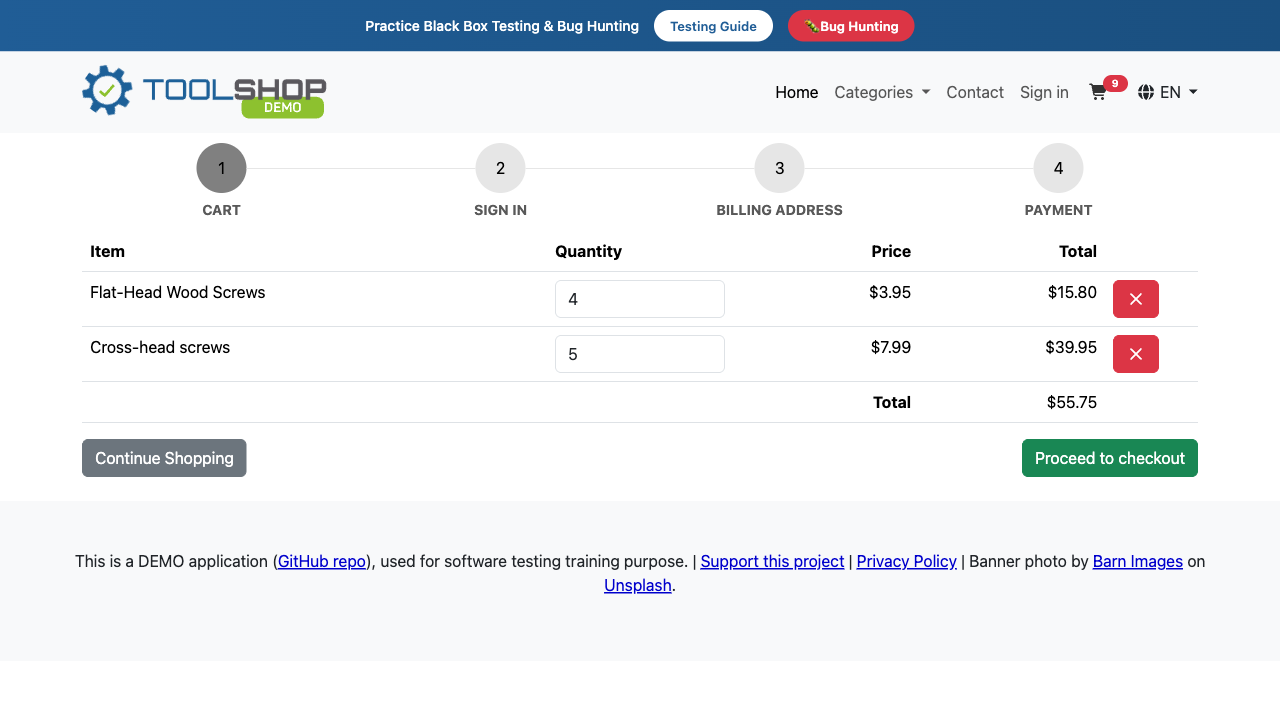

In [14]:
# Take screenshot after task completion
print("Screenshot AFTER task execution:")
await agent.screenshot("after_task.png")
display(Image(filename="after_task.png", width=800))